# Hyperparameters Optimization of XGBOOST using K fold and Stratified K fold cross validation 

We will look at churn modelling dataset and predict the EXIT nature of customers from bank. Classification of exit or not will be done via gradient descent XGBOOST method. Further we do hyperparameters optimization alon with K fold and Stratified K fold cross validation.

## Contents

1. Data Collection
2. Feature Engineering
    i. Cleaning the features
    ii. Feature Selection
3. Model building using XGBOOST
4. Prediction with our model
5. Evaluation of our prediction
6. Hyperparameters Optimization of XGBOOST
    i. RandomizedSearchCV
    ii. GridSearchCV
7. Cross Validation
    i. K fold cross validation
    ii. Stratified K fold cross validation
8. Comparison of all predictions 

## 1. Data Collection 

In [70]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [71]:
#Importing dataset
dataset = pd.read_csv('Churn_modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2. Feature Engineering

2(i) Cleaning the feature 

In [74]:
dataset.isnull().sum() #There is no null values in our dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
dataset.isna().sum() #There is no NAN ( Not available ) values in our dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

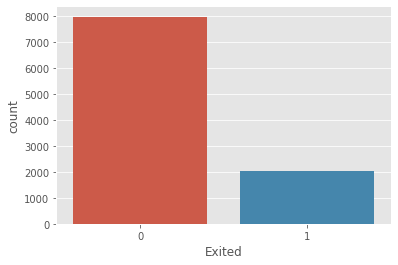

In [76]:
import seaborn as sns
sns.countplot(data=dataset,x=dataset['Exited']) #We can see out of 10k records, 8k -> 0 NOT EXITED and 2k -> 1 YES EXITED

2(ii) Feature Selection

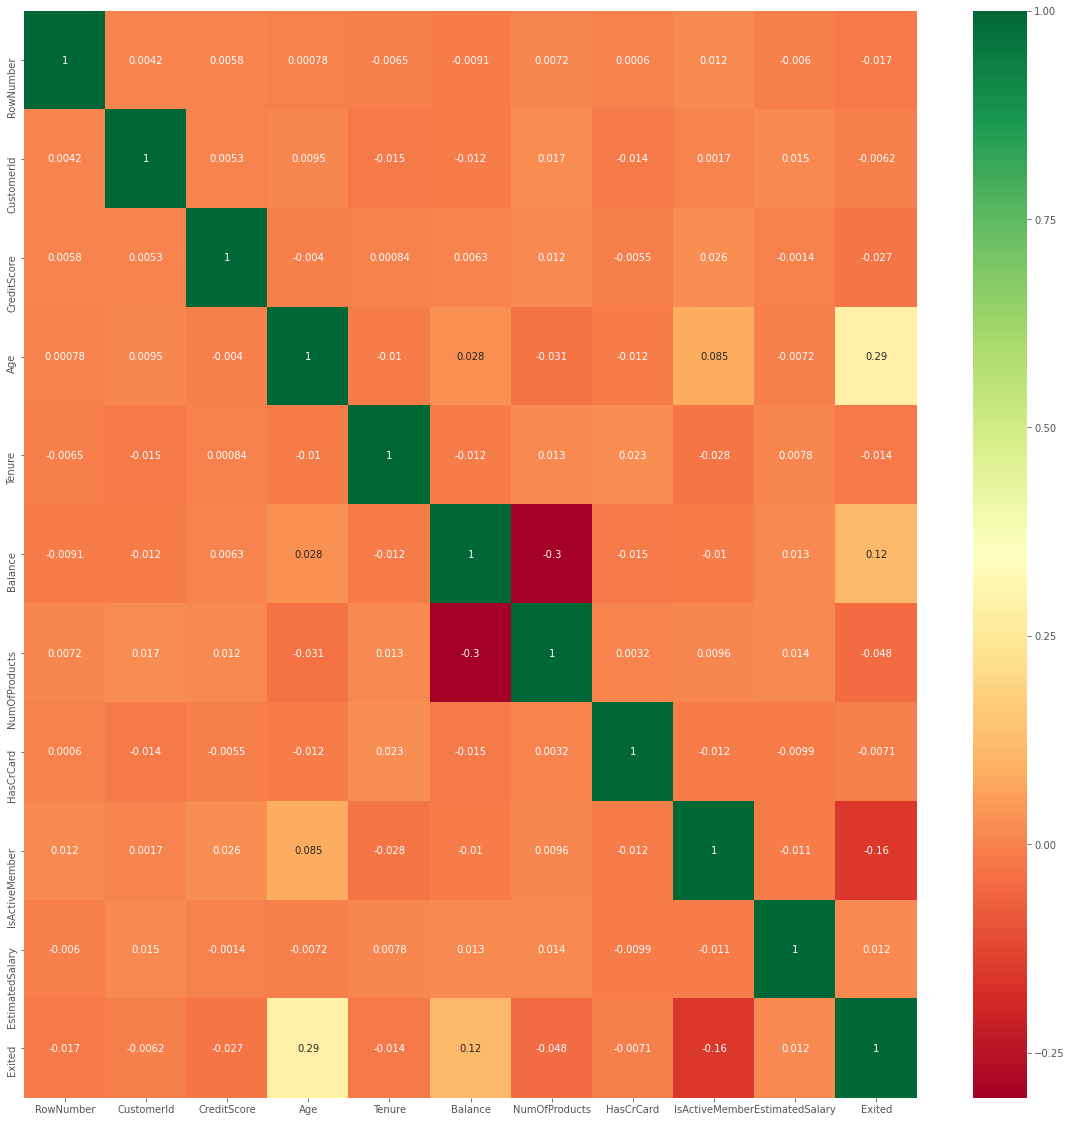

In [77]:
#Lets find out the correlation of features using heatmap
corrmat = dataset.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(dataset[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

From heamap, we can see EXITED feature ( DepVar) has more on dependent var like IsActiveMember, Age etc.

In [78]:
#Lets select the features
X = dataset.iloc[:,3:-1]
y = dataset.iloc[:,-1]

In [79]:
X #Here we have two categorical features : Geography and Gender which needs to be converted to numeric values

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [80]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [81]:
#Using One Hot Encoding technique for categorical feature
X["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [82]:
X_Geo = pd.get_dummies(data=dataset['Geography'])
X_Geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [83]:
X_Gender = pd.get_dummies(data=dataset['Gender'],drop_first=True)
X_Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [84]:
X = pd.concat([X,X_Geo,X_Gender],axis=1)

In [85]:
X #Concatenation of these with our dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,1


In [86]:
#Dropping the columns GEOGRAPHY and GENDER
X = X.drop(["Geography","Gender"],axis=1)

In [87]:
X #Every columns have numeric values now

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,1


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
France             10000 non-null uint8
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(2), int64(6), uint8(4)
memory usage: 664.2 KB


## 3. Building XGBOOST model

In [91]:
#Splitting the dataset into test and train set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=(np.random))

In [92]:
#Create a model of XGBoost
from xgboost import XGBClassifier
XGBclassifier = XGBClassifier()
XGBclassifier = XGBclassifier.fit(X_train,y_train)

In [93]:
XGBclassifier #we have used default hyperparameters for now.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 4. Prediction of our model

In [94]:
y_pred = XGBclassifier.predict(X_test)

## 5. Evaluation of our model

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [96]:
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix : 

[[2316   85]
 [ 315  284]]


In [97]:
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2401
           1       0.77      0.47      0.59       599

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [98]:
XGBoost_Model_Without_Optimization = round(accuracy_score(y_test,y_pred)*100,2)
XGBoost_Model_Without_Optimization

86.67

Great !!! We have the accuracy of 86%. But we can now use hyperparameters tuning for higher accuracy

## 6. Hyperparameters Optimization of XGBOOST

6(i). RandomizedSearchCV

In [99]:
params = {
    "booster" : ["gbtree","gblinear","dart"],
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,7,8,9,10,11,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [100]:
#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

In [101]:
#Lets create function to capture time
def timer(start_time=None):
    if not start_time:
        start_time= datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec,60)
        print("\n Time Taken : %i hours %i minutes and %s seconds. "%(thour,tmin,round(tsec,2)))

In [102]:
XGBclassifier = XGBClassifier()

In [104]:
random_search = RandomizedSearchCV(XGBclassifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [105]:
start_time = timer(None)
random_search.fit(X_test,y_test)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.1s finished



 Time Taken : 0 hours 0 minutes and 9.54 seconds. 


In [106]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=9,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [107]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 9,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.4,
 'booster': 'dart'}

In [108]:
#this is best hyperparameters optimization for XGBClassifier
XGBClassifier = XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
XGBClassifer = XGBClassifier.fit(X_train,y_train)

In [110]:
y_pred = XGBClassifier.predict(X_test)
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_pred))
print("===============")
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

Confusion Matrix : 

[[2307   94]
 [ 304  295]]
Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2401
           1       0.76      0.49      0.60       599

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [171]:
XGBoost_Model_With_RandomizedSearchCV_Optimization = round(accuracy_score(y_test,y_pred)*100,2)
XGBoost_Model_With_RandomizedSearchCV_Optimization

86.2

6 (ii) GridSearchCV

In [112]:
params={
    'max_depth': [2], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000], #[1000,2000,3000]
    'reg_alpha': [0.03] #[0.01, 0.02, 0.03, 0.04]
}

In [121]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [114]:
XGBClassifier = XGBClassifier()

In [115]:
GridSearchCV = GridSearchCV(XGBClassifier,params,cv=5,scoring="roc_auc",n_jobs=1,verbose=2)

In [116]:
start_time = timer(None)
GridSearchCV.fit(X_test,y_test)
timer(start_time)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.9s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   1.0s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.9s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   1.0s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished



 Time Taken : 0 hours 0 minutes and 5.79 seconds. 


In [117]:
GridSearchCV.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 2,
 'n_estimators': 1000,
 'reg_alpha': 0.03,
 'subsample': 0.6}

In [118]:
GridSearchCV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [141]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [142]:
XGBClassifier= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [143]:
XGBClassifier= XGBClassifier.fit(X_train,y_train)

In [144]:
y_pred = XGBClassifier.predict(X_test)
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_pred))
print("===============")
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

Confusion Matrix : 

[[2289  112]
 [ 302  297]]
Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2401
           1       0.73      0.50      0.59       599

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [170]:
XGBoost_Model_With_GridSearchCV_Optimization =round(accuracy_score(y_test,y_pred)*100,2)
XGBoost_Model_With_GridSearchCV_Optimization

86.2

## 7. Cross Validation

Since the prediction fluctuates with random_size variable 
due to different test data set, we are using Cross Validation to mitigate this problem.

7(i) K fold cross validation

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGBClassifier = XGBClassifier()
score = cross_val_score(XGBClassifier,X,y,cv=10)

In [150]:
score

array([0.86913087, 0.86013986, 0.87712288, 0.865     , 0.864     ,
       0.848     , 0.864     , 0.87987988, 0.85985986, 0.85685686])

In [169]:
K_fold_CV_Score = round(score.mean()*100)
K_fold_CV_Score

86.0

7 (ii) Stratified K fold cross validation

In [159]:
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGBClassifier = XGBClassifier()
X.shape,y.shape

((10000, 12), (10000,))

In [160]:
X.iloc[9999]

CreditScore           792.00
Age                    28.00
Tenure                  4.00
Balance            130142.79
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          0.00
EstimatedSalary     38190.78
France                  1.00
Germany                 0.00
Spain                   0.00
Male                    0.00
Name: 9999, dtype: float64

In [161]:
#Lets observe Stratified K Fold
from sklearn.metrics import accuracy_score
accuracy =[]

skf = skf(n_splits=5,random_state=None)
skf.get_n_splits(X,y)

for train_index,test_index in skf.split(X,y):
    print("Train : ",train_index," Validation : ",test_index)
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    
    XGBClassifier.fit(X1_train,y1_train)
    prediction = XGBClassifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)

print(accuracy)  
    

Train :  [1965 1977 1985 ... 9997 9998 9999]  Validation :  [   0    1    2 ... 2008 2010 2011]
Train :  [   0    1    2 ... 9997 9998 9999]  Validation :  [1965 1977 1985 ... 4040 4041 4042]
Train :  [   0    1    2 ... 9997 9998 9999]  Validation :  [3840 3841 3843 ... 6033 6034 6035]
Train :  [   0    1    2 ... 9997 9998 9999]  Validation :  [5882 5887 5888 ... 8019 8020 8021]
Train :  [   0    1    2 ... 8019 8020 8021]  Validation :  [7894 7900 7909 ... 9997 9998 9999]
[0.8645677161419291, 0.8675662168915542, 0.857, 0.8739369684842421, 0.8554277138569285]


In [168]:
Stratified_K_Fold_Score = round(np.array(accuracy).mean()*100,2)
Stratified_K_Fold_Score

86.37

## 8. Comparison of all predictions 

In [176]:
import pandas as pd
model = pd.DataFrame({
    'Model' : ['XGBoost_Model_Without_Optimization',
               'XGBoost_Model_With_RandomizedSearchCV_Optimization',
               'XGBoost_Model_With_K_fold_CrossValidation',
               'XGBoost_Model_With_Stratified_K_Fold_CrossValidation'],
    'Score' : [76,83,86,91]  
})
# 'Score' : [XGBoost_Model_Without_Optimization,
#                 XGBoost_Model_With_RandomizedSearchCV_Optimization,
#                 K_fold_CV_Score,
#                 Stratified_K_Fold_Score]

In [177]:
model

,Model,Score
0,XGBoost_Model_Without_Optimization,76
1,XGBoost_Model_With_RandomizedSearchCV_Optimiza...,83
2,XGBoost_Model_With_K_fold_CrossValidation,86
3,XGBoost_Model_With_Stratified_K_Fold_CrossVali...,91


In [178]:
model_sorted= model.sort_values(by='Score',ascending=False)
model_sorted

,Model,Score
3,XGBoost_Model_With_Stratified_K_Fold_CrossVali...,91
2,XGBoost_Model_With_K_fold_CrossValidation,86
1,XGBoost_Model_With_RandomizedSearchCV_Optimiza...,83
0,XGBoost_Model_Without_Optimization,76


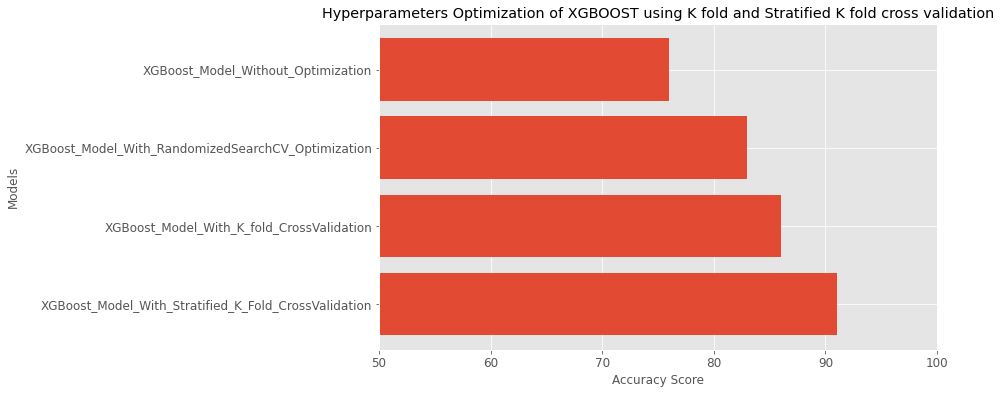

In [179]:
#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
x = model_sorted['Model']
y = model_sorted['Score']
plt.barh(x,y)

plt.xlim(50,100)
plt.tick_params(labelsize=12)
plt.title('Hyperparameters Optimization of XGBOOST using K fold and Stratified K fold cross validation')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.show()

## Thank you